<a href="https://colab.research.google.com/github/Ranjan4Kumar/IMDB_MOVIE_REVIEW/blob/main/imdb_movies_eda_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive
drive.mount('/content/drive/')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Reading Files

In [10]:
temp=pd.read_csv('/content/drive/My Drive/DS/Project_2/imdb_top250_movies.csv')
temp.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
1,1,2,The Godfather,1972,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",tt0068646,movie,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com
2,2,3,The Godfather: Part II,1974,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",tt0071562,movie,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/
3,3,4,The Dark Knight,2008,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/
4,4,5,12 Angry Men,1957,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",tt0050083,movie,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men


# Descriptive Analysis

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   Num         250 non-null    int64  
 2   Title       250 non-null    object 
 3   Year        250 non-null    int64  
 4   Released    248 non-null    object 
 5   Runtime     250 non-null    object 
 6   Genre       250 non-null    object 
 7   Director    250 non-null    object 
 8   Writer      249 non-null    object 
 9   Actors      250 non-null    object 
 10  Plot        250 non-null    object 
 11  Language    250 non-null    object 
 12  Country     250 non-null    object 
 13  Awards      245 non-null    object 
 14  Metascore   177 non-null    float64
 15  imdbRating  250 non-null    float64
 16  imdbVotes   250 non-null    object 
 17  imdbID      250 non-null    object 
 18  Type        250 non-null    object 
 19  DVD         247 non-null    o

In [12]:
temp.describe()

,Unnamed: 0,Num,Year,Metascore,imdbRating
count,250.000000,250.000000,250.000000,177.000000,250.000000
mean,124.500000,125.500000,1982.676000,80.045198,8.244000
std,72.312977,72.312977,24.809212,11.030340,0.245735
min,0.000000,1.000000,1921.000000,53.000000,8.000000
25%,62.250000,63.250000,1961.250000,72.000000,8.100000
50%,124.500000,125.500000,1988.000000,81.000000,8.200000
75%,186.750000,187.750000,2003.000000,89.000000,8.375000
max,249.000000,250.000000,2017.000000,100.000000,9.300000


# Data Wrengling & Processing Null Values

In [13]:
temp.isna().sum()

Unnamed: 0      0
Num             0
Title           0
Year            0
Released        2
Runtime         0
Genre           0
Director        0
Writer          1
Actors          0
Plot            0
Language        0
Country         0
Awards          5
Metascore      73
imdbRating      0
imdbVotes       0
imdbID          0
Type            0
DVD             3
BoxOffice     175
Production      0
Website       119
dtype: int64

In [14]:
avg=temp['Metascore'].mean()
avg

80.045197740113

In [15]:
temp['Metascore']=temp['Metascore'].fillna(avg)

In [16]:
temp['Actors']=temp['Actors'].astype(str).str.split(",")
temp=temp.explode("Actors",ignore_index=True)
temp.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Tim Robbins,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
1,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Morgan Freeman,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
2,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Bob Gunton,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
3,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",William Sadler,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
4,1,2,The Godfather,1972,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...",Marlon Brando,...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",tt0068646,movie,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com


In [17]:
temp['Genre']=temp['Genre'].astype(str).str.split(",")
temp=temp.explode("Genre",ignore_index=True)
temp.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,Crime,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Tim Robbins,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
1,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Tim Robbins,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
2,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,Crime,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Morgan Freeman,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
3,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Morgan Freeman,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
4,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,Crime,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Bob Gunton,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN


In [18]:
temp.shape

(2504, 23)

In [19]:
import regex as re
temp = pd.DataFrame(temp)

dlist1=[]


for i in temp['imdbVotes']:
    
    check =re.sub(',','', i)
  
    dlist1.append(check)
   
    
temp['imdbVotes']=dlist1

In [20]:
import regex as re
temp = pd.DataFrame(temp)

dlist1=[]


for i in temp['Runtime']:
    
    check =re.sub('min','', i)
  
    dlist1.append(check)
   
    
temp['Runtime']=dlist1

In [21]:
temp['imdbVotes']=temp['imdbVotes'].astype('int')

temp['Runtime']=temp['Runtime'].astype('int')
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2504 non-null   int64  
 1   Num         2504 non-null   int64  
 2   Title       2504 non-null   object 
 3   Year        2504 non-null   int64  
 4   Released    2480 non-null   object 
 5   Runtime     2504 non-null   int64  
 6   Genre       2504 non-null   object 
 7   Director    2504 non-null   object 
 8   Writer      2496 non-null   object 
 9   Actors      2504 non-null   object 
 10  Plot        2504 non-null   object 
 11  Language    2504 non-null   object 
 12  Country     2504 non-null   object 
 13  Awards      2452 non-null   object 
 14  Metascore   2504 non-null   float64
 15  imdbRating  2504 non-null   float64
 16  imdbVotes   2504 non-null   int64  
 17  imdbID      2504 non-null   object 
 18  Type        2504 non-null   object 
 19  DVD         2468 non-null  

# Top Movies By IMDB Votes

In [22]:
TopMovies=temp[['Title', 'imdbVotes']].sort_values(by="imdbVotes",ascending=False)
TopMovies=TopMovies.drop_duplicates(subset = "imdbVotes")
TopMovies.head(10)

,Title,imdbVotes
0,The Shawshank Redemption,1825626
32,The Dark Knight,1802351
117,Inception,1592306
76,Fight Club,1458676
69,Pulp Fiction,1427451
100,Forrest Gump,1365937
83,The Lord of the Rings: The Fellowship of the Ring,1326876
159,The Matrix,1314628
67,The Lord of the Rings: The Return of the King,1304569
9,The Godfather,1243444


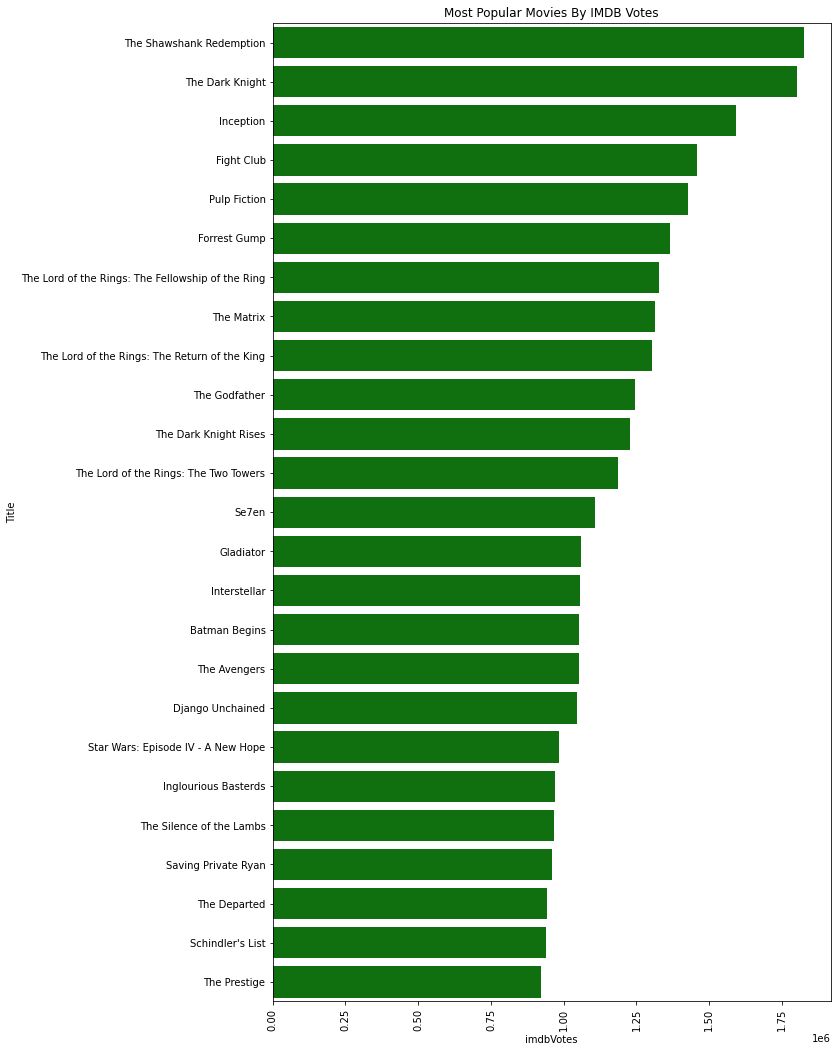

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,18))
graph=sns.barplot(y='Title',x='imdbVotes',color='g',data=TopMovies.head(25))
graph.set_title('Most Popular Movies By IMDB Votes')
plt.xticks(rotation=90)
plt.show()

# Top Movies By Metascore

In [25]:
TopMovies=temp[['Title', 'Metascore']].sort_values(by="Metascore",ascending=False)
TopMovies=TopMovies.drop_duplicates(subset = "Metascore")
TopMovies.head(10)

,Title,Metascore
1868,The Wizard of Oz,100.0
1966,The Night of the Hunter,99.0
1201,Gone with the Wind,97.0
1584,12 Years a Slave,96.0
788,Toy Story,95.0
1049,Inside Out,94.0
1081,La La Land,93.0
160,Star Wars: Episode IV - A New Hope,92.0
2462,Patton,91.0
2085,Before Sunset,90.0


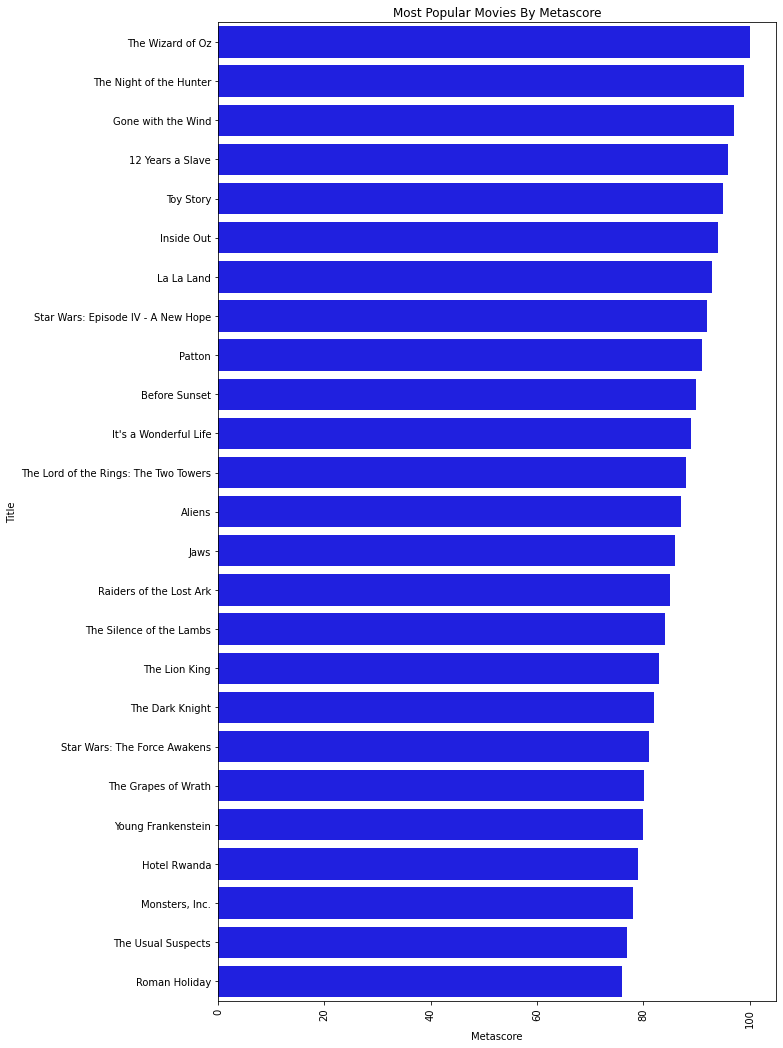

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,18))
graph=sns.barplot(y='Title',x='Metascore',color='blue',data=TopMovies.head(25))
graph.set_title('Most Popular Movies By Metascore')
plt.xticks(rotation=90)
plt.show()

# Top Production Companies By IMDB Votes

In [27]:

TopMovies=temp[['Production', 'imdbVotes']].sort_values(by="imdbVotes",ascending=False)
TopMovies=TopMovies.drop_duplicates(subset = "imdbVotes")
TopMovies=TopMovies.head(50)
TopMovies.head(10)

,Production,imdbVotes
0,Columbia Pictures,1825626
32,Warner Bros. Pictures/Legendary,1802351
117,Warner Bros. Pictures,1592306
76,20th Century Fox,1458676
69,Miramax Films,1427451
100,Paramount Pictures,1365937
83,New Line Cinema,1326876
159,Warner Bros. Pictures,1314628
67,New Line Cinema,1304569
9,Paramount Pictures,1243444


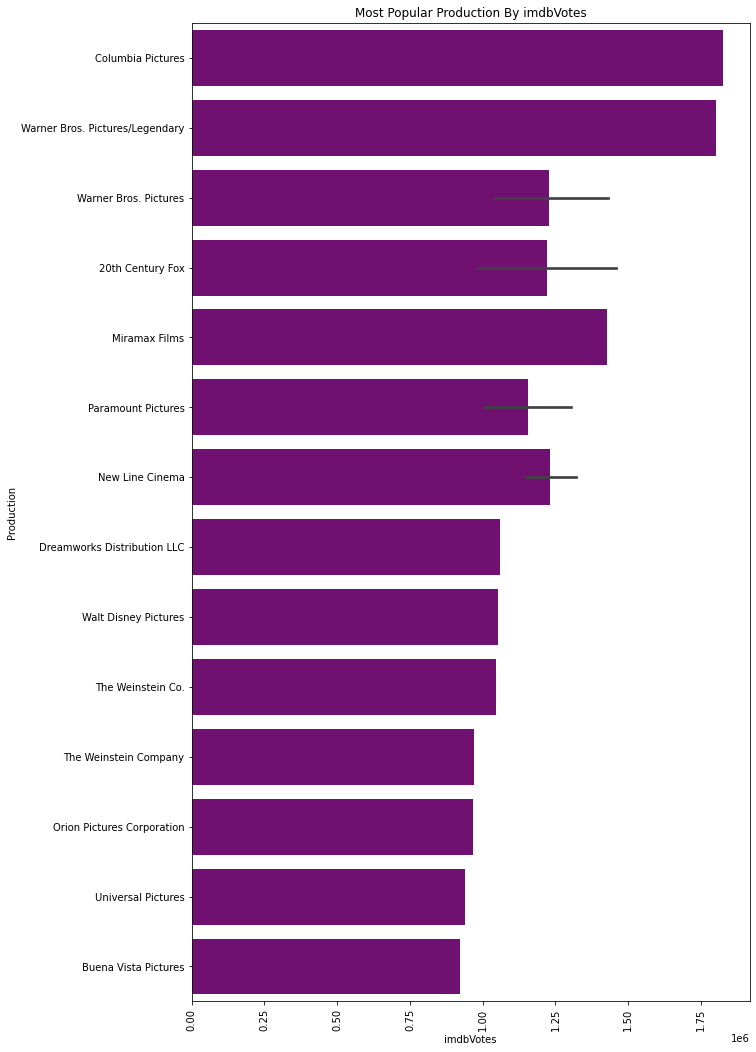

In [28]:
plt.figure(figsize=(10,18))
graph=sns.barplot(y='Production',x='imdbVotes',color='purple',data=TopMovies.head(25))
graph.set_title('Most Popular Production By imdbVotes')
plt.xticks(rotation=90)
plt.show()

# Top Actors By IMDB Votes of ther Movies

In [29]:
byactors=temp[['Actors', 'imdbVotes']].sort_values(by="imdbVotes",ascending=False)
byactors=byactors.drop_duplicates(subset = "imdbVotes")
byactors

,Actors,imdbVotes
0,Tim Robbins,1825626
32,Aaron Eckhart,1802351
117,Leonardo DiCaprio,1592306
76,Edward Norton,1458676
69,Tim Roth,1427451
...,...,...
1558,Joyce Carey,28038
2471,Jane Wyman,26834
2189,Groucho Marx,26025
1906,Rhonda Fleming,24842


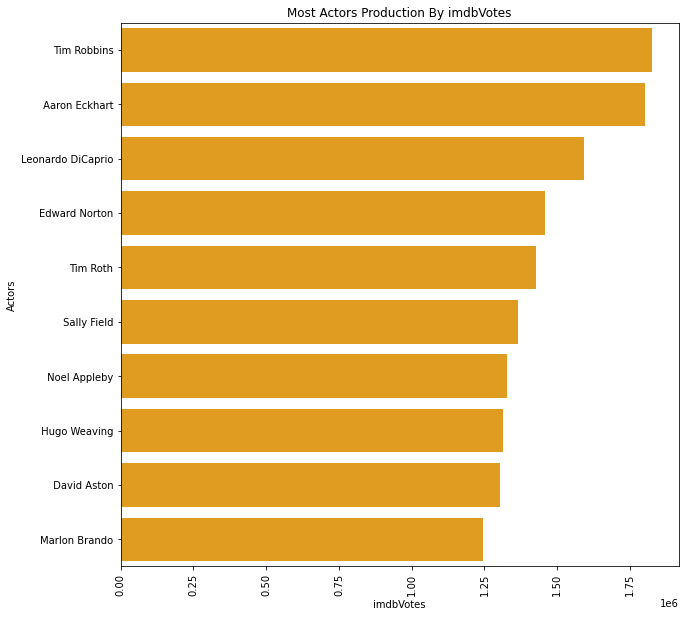

In [30]:
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Actors',x='imdbVotes',color='orange',data=byactors.head(10))
graph.set_title('Most Actors Production By imdbVotes')
plt.xticks(rotation=90)
plt.show()

# Effect of Runtime on Votes/Popularity

In [ ]:
moviesbybudget=temp[['Runtime', 'imdbVotes']].sort_values(by="Runtime",ascending=False)
moviesbybudget=moviesbybudget.drop_duplicates(subset = "Runtime")
moviesbybudget=moviesbybudget.drop_duplicates(subset = "imdbVotes")
moviesbybudget



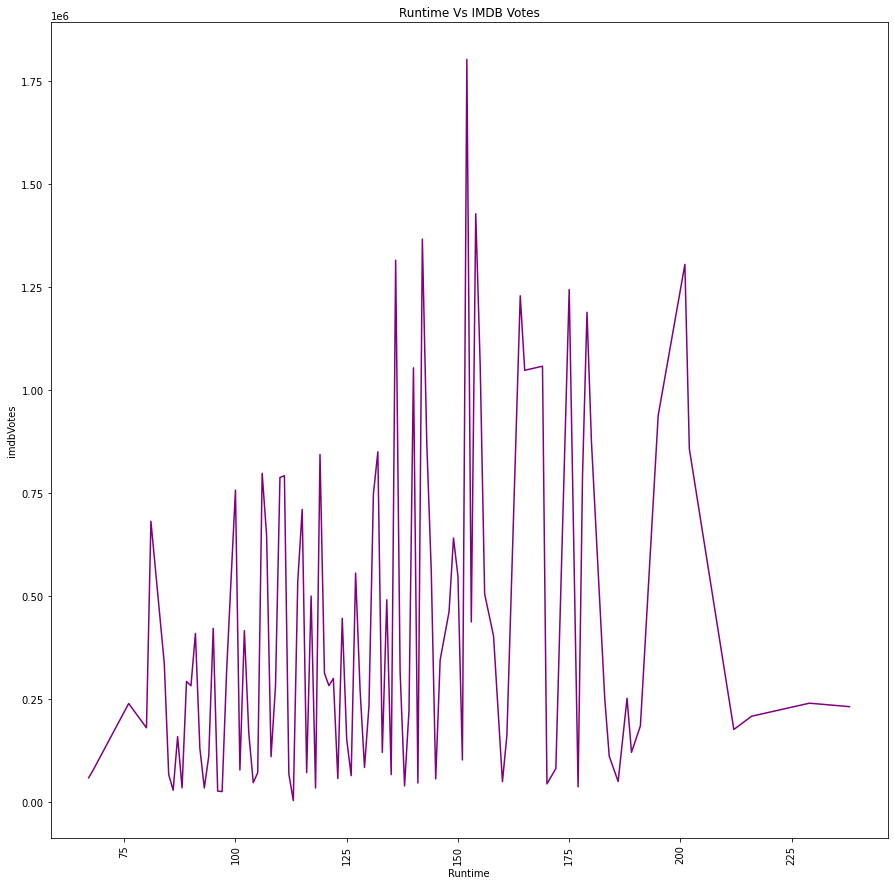

In [32]:
plt.figure(figsize=(15,15))
graph=sns.lineplot(x='Runtime',y='imdbVotes',color='purple',data=moviesbybudget)
graph.set_title('Runtime Vs IMDB Votes')
plt.xticks(rotation=90) 
plt.show()

# Conclusion
* If you want to make a Succeful movies ,the most important things to keep in minds are Production Companies ,Actors ,Runtime and Genres 
* Runtime has a very important effect on popularity, It start decreasing when runtime start exceeding 200 minutes

